# Time evolution Plots

In [173]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.optimize import curve_fit

from typing import Literal, Union

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors, load_list_of_lists, anim, get_cx, get_cy

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

font = {'family': 'serif', 'size': 20}
plt.rcParams.update({'font.family': font['family'], 'font.size': font['size']})

model = "Z2_dual"
path = "marcos"
# path = "pc"
cx = [3,37]
cy = [3,3]
# cx = None
# cy = None

if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"
    boundcond = "obc"
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    path_tensor = f"C:/Users/HP/Desktop/projects/1_Z2"
    parent_path = path_tensor
    path_figures = "G:/My Drive/projects/1_Z2"

    # parent_path = "G:/My Drive/projects/1_Z2"
    # path_tensor = "D:/code/projects/1_Z2"
elif path == "mac":
    # parent_path = "/Users/fradm98/Google Drive/My Drive/projects/1_Z2"
    path_tensor = "/Users/fradm98/Desktop/projects/1_Z2"
    parent_path = path_tensor
elif path == "marcos":
    path_figures = "/Users/fradm/Google Drive/My Drive/projects/1_Z2"
    path_tensor = "/Users/fradm/Desktop/projects/1_Z2"
    parent_path = path_tensor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
l, L, R, bc = 3, 3, 1, "pbc"
l, L, R, bc = 4, 30, 10, "pbc"
h_i, h_ev = 10.0, 0.7
delta, steps = 0.01, 100
save_gif = True
cx = get_cx(L=L, R=R)
cy = get_cy(l=l, bc=bc)
chis = [2,4,8,16]
chis = [32,64,128]
chis = [16,32,64]

In [175]:
trunc_err = []
for chi in chis:
    trunc_err_chi = np.load(
        f"{path_tensor}/results/error_data/errors_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    trunc_err.append(trunc_err_chi)

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/3008103747.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Truncation/Compression error: ${||\psi - O \phi||}^2$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/3008103747.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps+1)), errs, marker='o', linestyle="", markersize=5, alpha=0.5, color=colors[i], label=f"$\chi: {chis[i]}$")


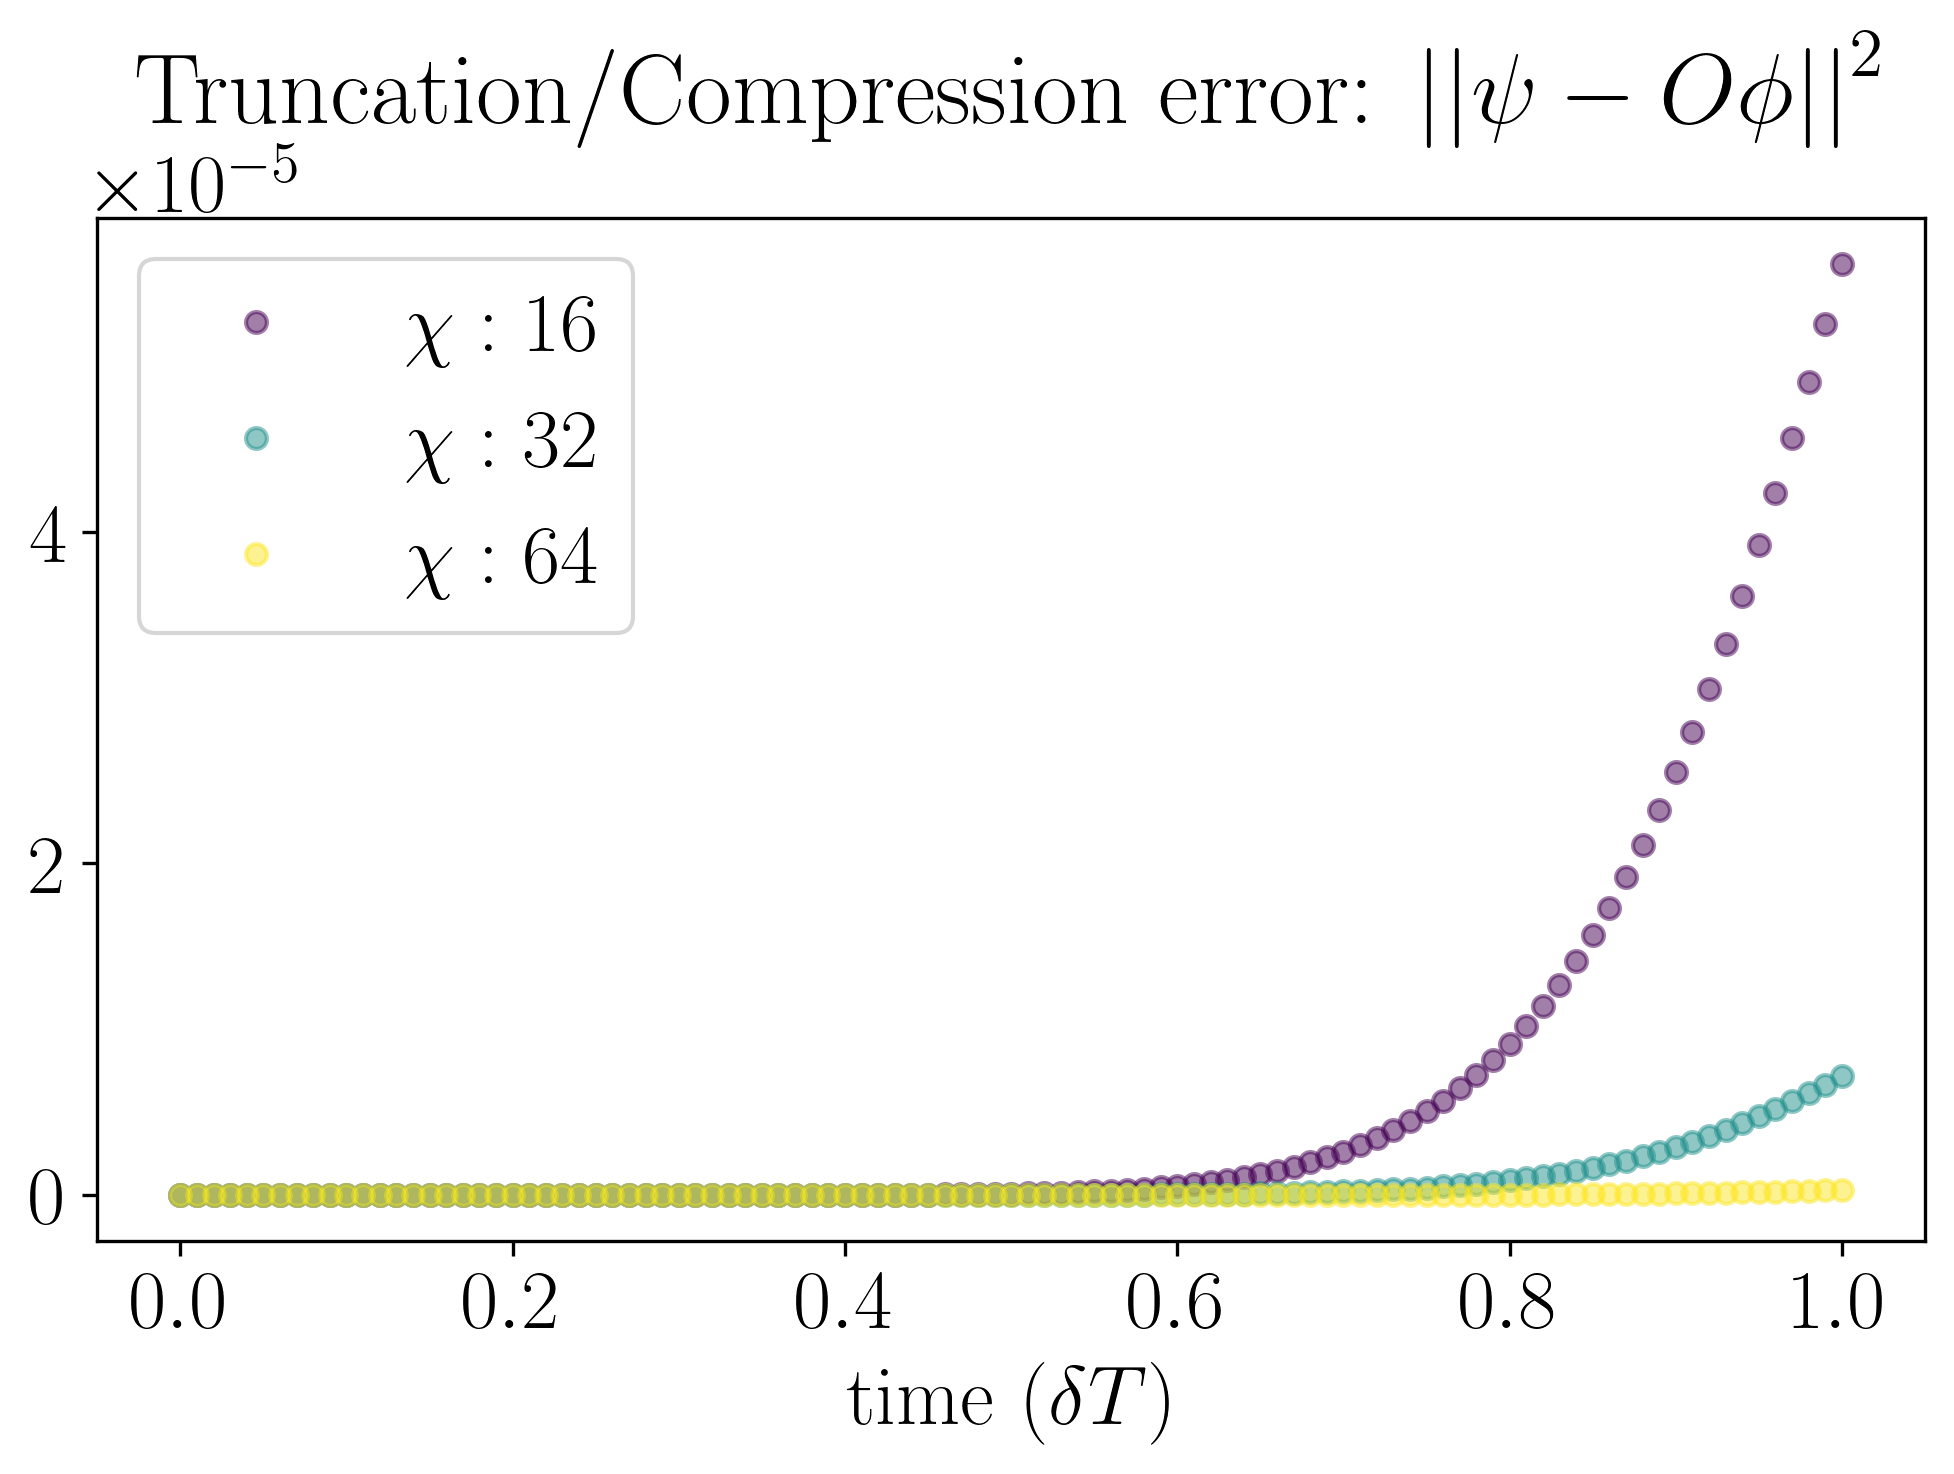

In [176]:
colors = create_sequential_colors(len(chis))
plt.title("Truncation/Compression error: ${||\psi - O \phi||}^2$")
for i, errs in enumerate(trunc_err):
    plt.plot(delta*np.asarray(range(steps+1)), errs, marker='o', linestyle="", markersize=5, alpha=0.5, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

In [177]:
entropies = []
for chi in chis:
    entr_chi = load_list_of_lists(
        f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    entropies.append(entr_chi)

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/1236893946.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps+1)), entrs, marker='o', linestyle="", markersize=5, alpha=0.5, color=colors[i], label=f"$\chi: {chis[i]}$")


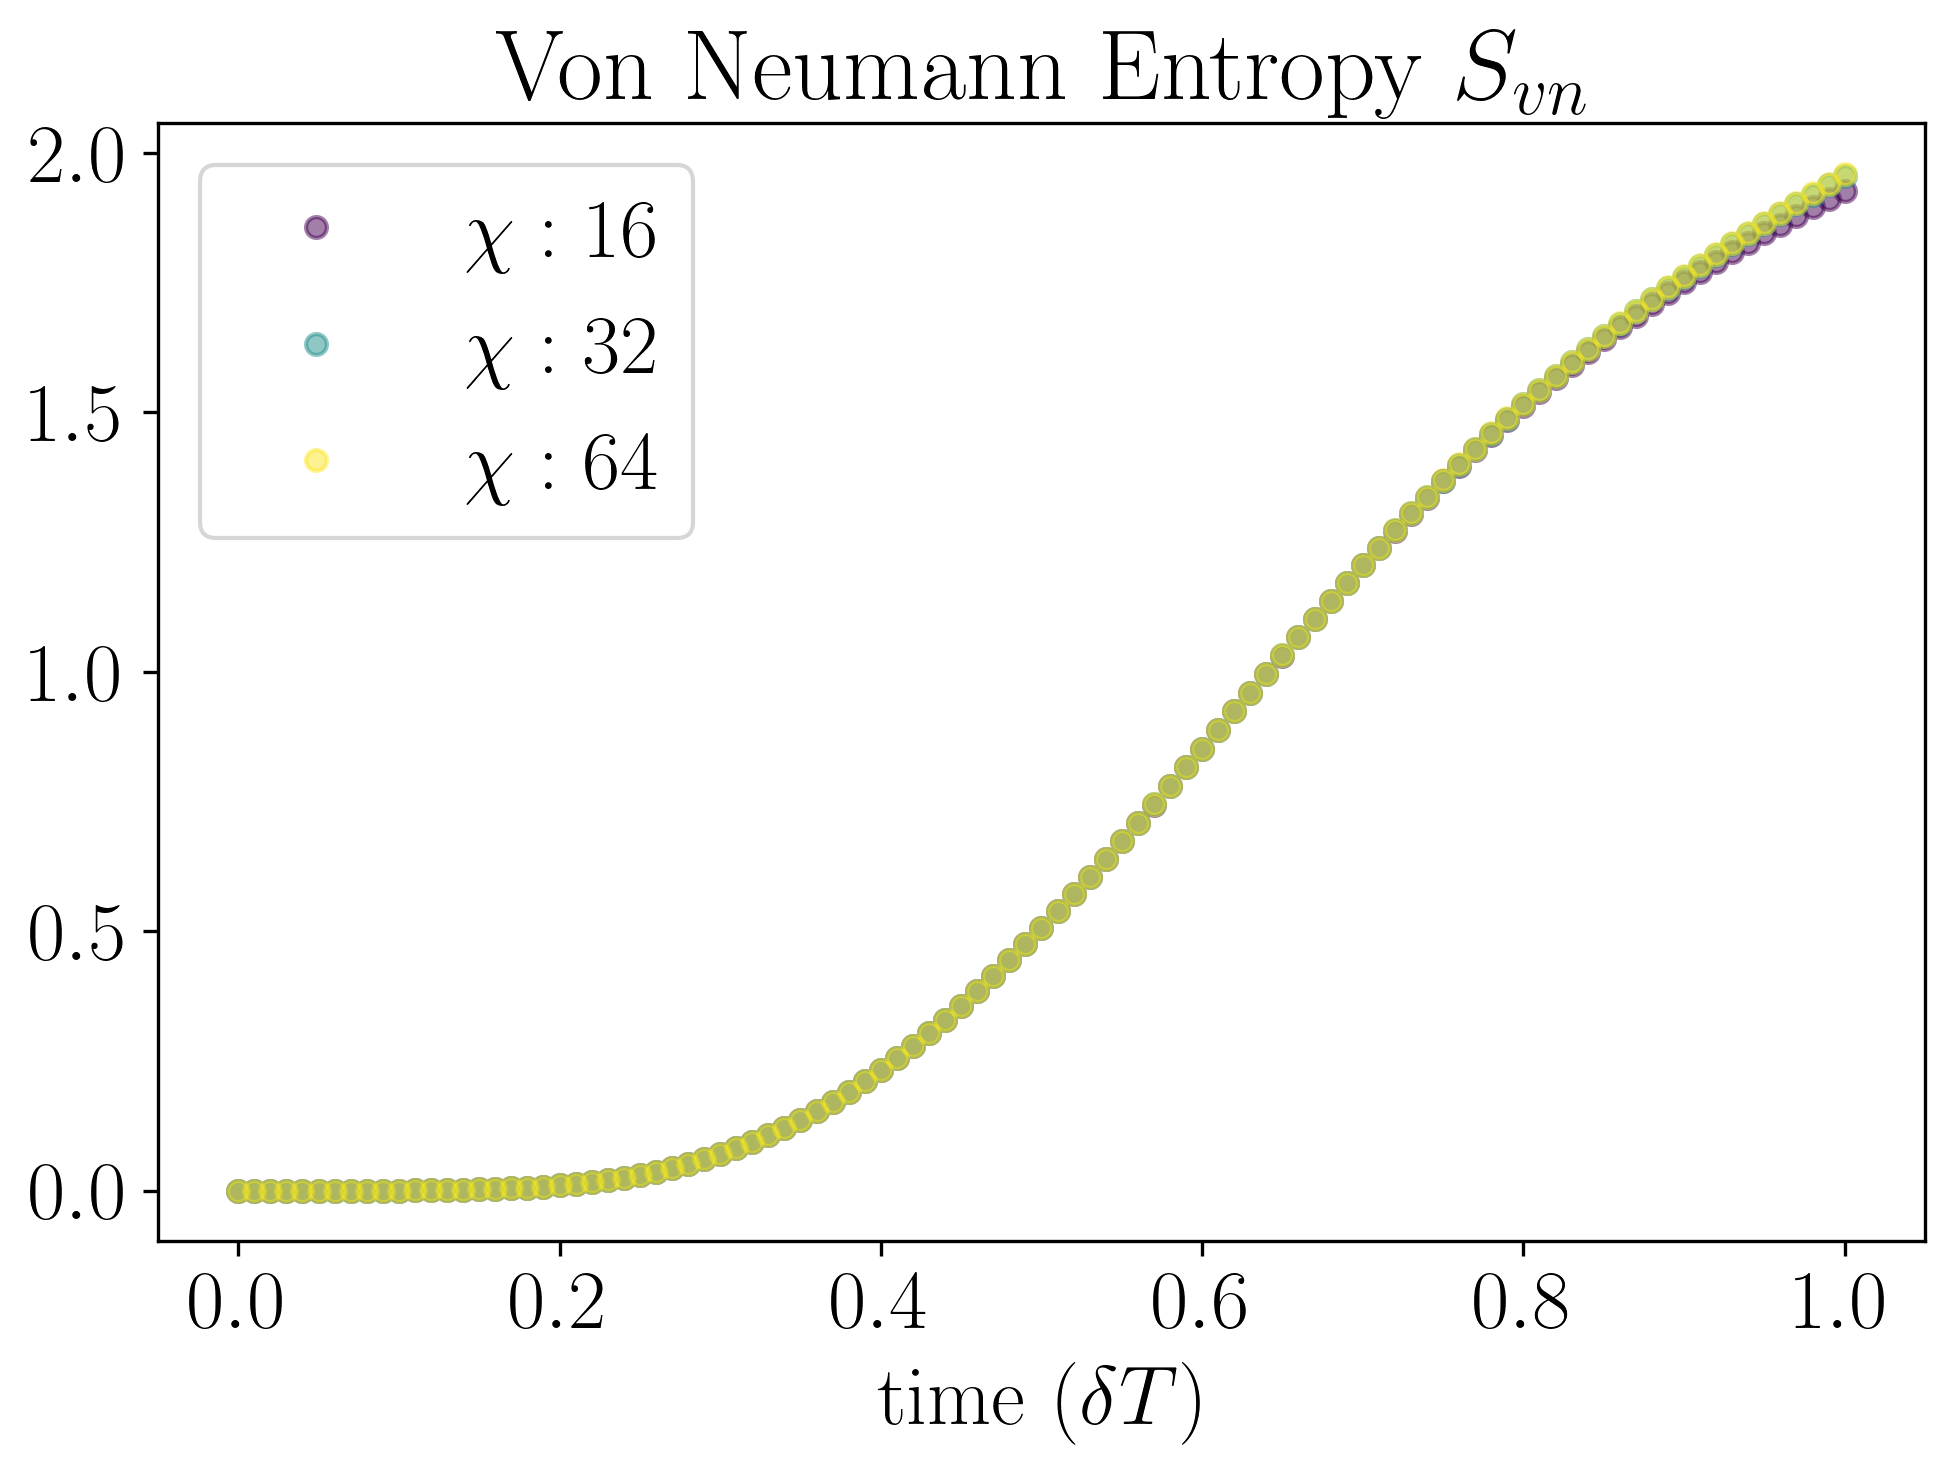

In [178]:
colors = create_sequential_colors(len(chis))
plt.title("Von Neumann Entropy $S_{vn}$")
for i, entrs in enumerate(entropies):
    plt.plot(delta*np.asarray(range(steps+1)), entrs, marker='o', linestyle="", markersize=5, alpha=0.5, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

In [180]:
smvals = []
for chi in chis:
    sv_chi = load_list_of_lists(
        f"{path_tensor}/results/entropy_data/{L//2}_schmidt_vals_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    smvals.append(sv_chi)
smvals.reverse()
chis.reverse()

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/2142703269.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(sv[index], marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")


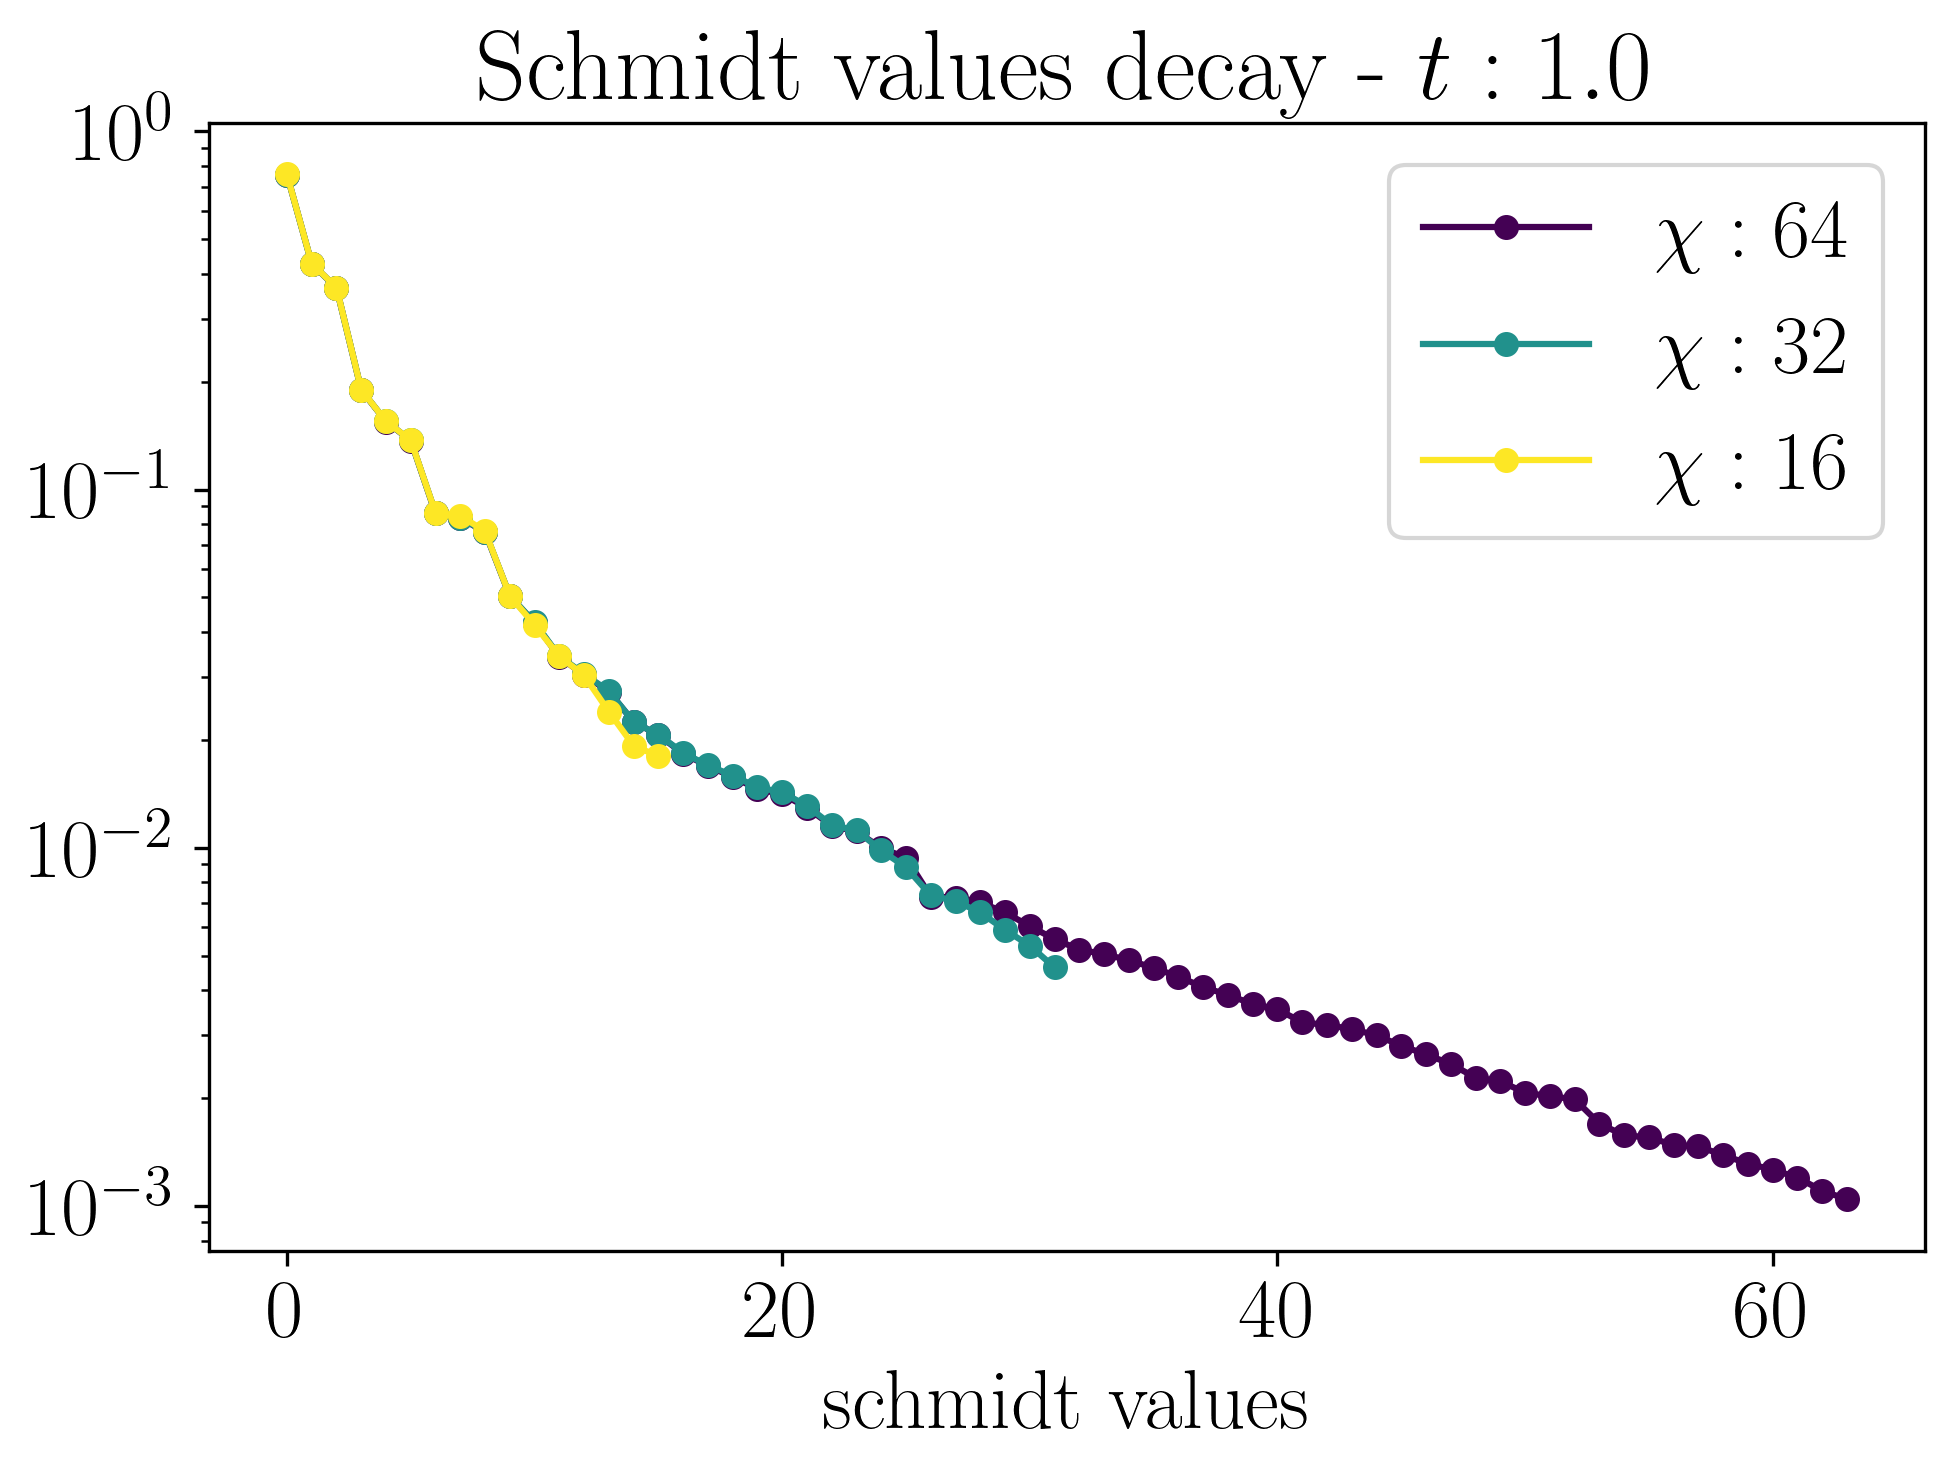

In [181]:
colors = create_sequential_colors(len(chis))
index = -1
plt.title(f"Schmidt values decay - $t: {delta*(range(steps)[index]+1)}$")
for i, sv in enumerate(smvals):
    plt.plot(sv[index], marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("schmidt values")
plt.yscale("log")
plt.legend()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/4031594994.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps)), arr, marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")


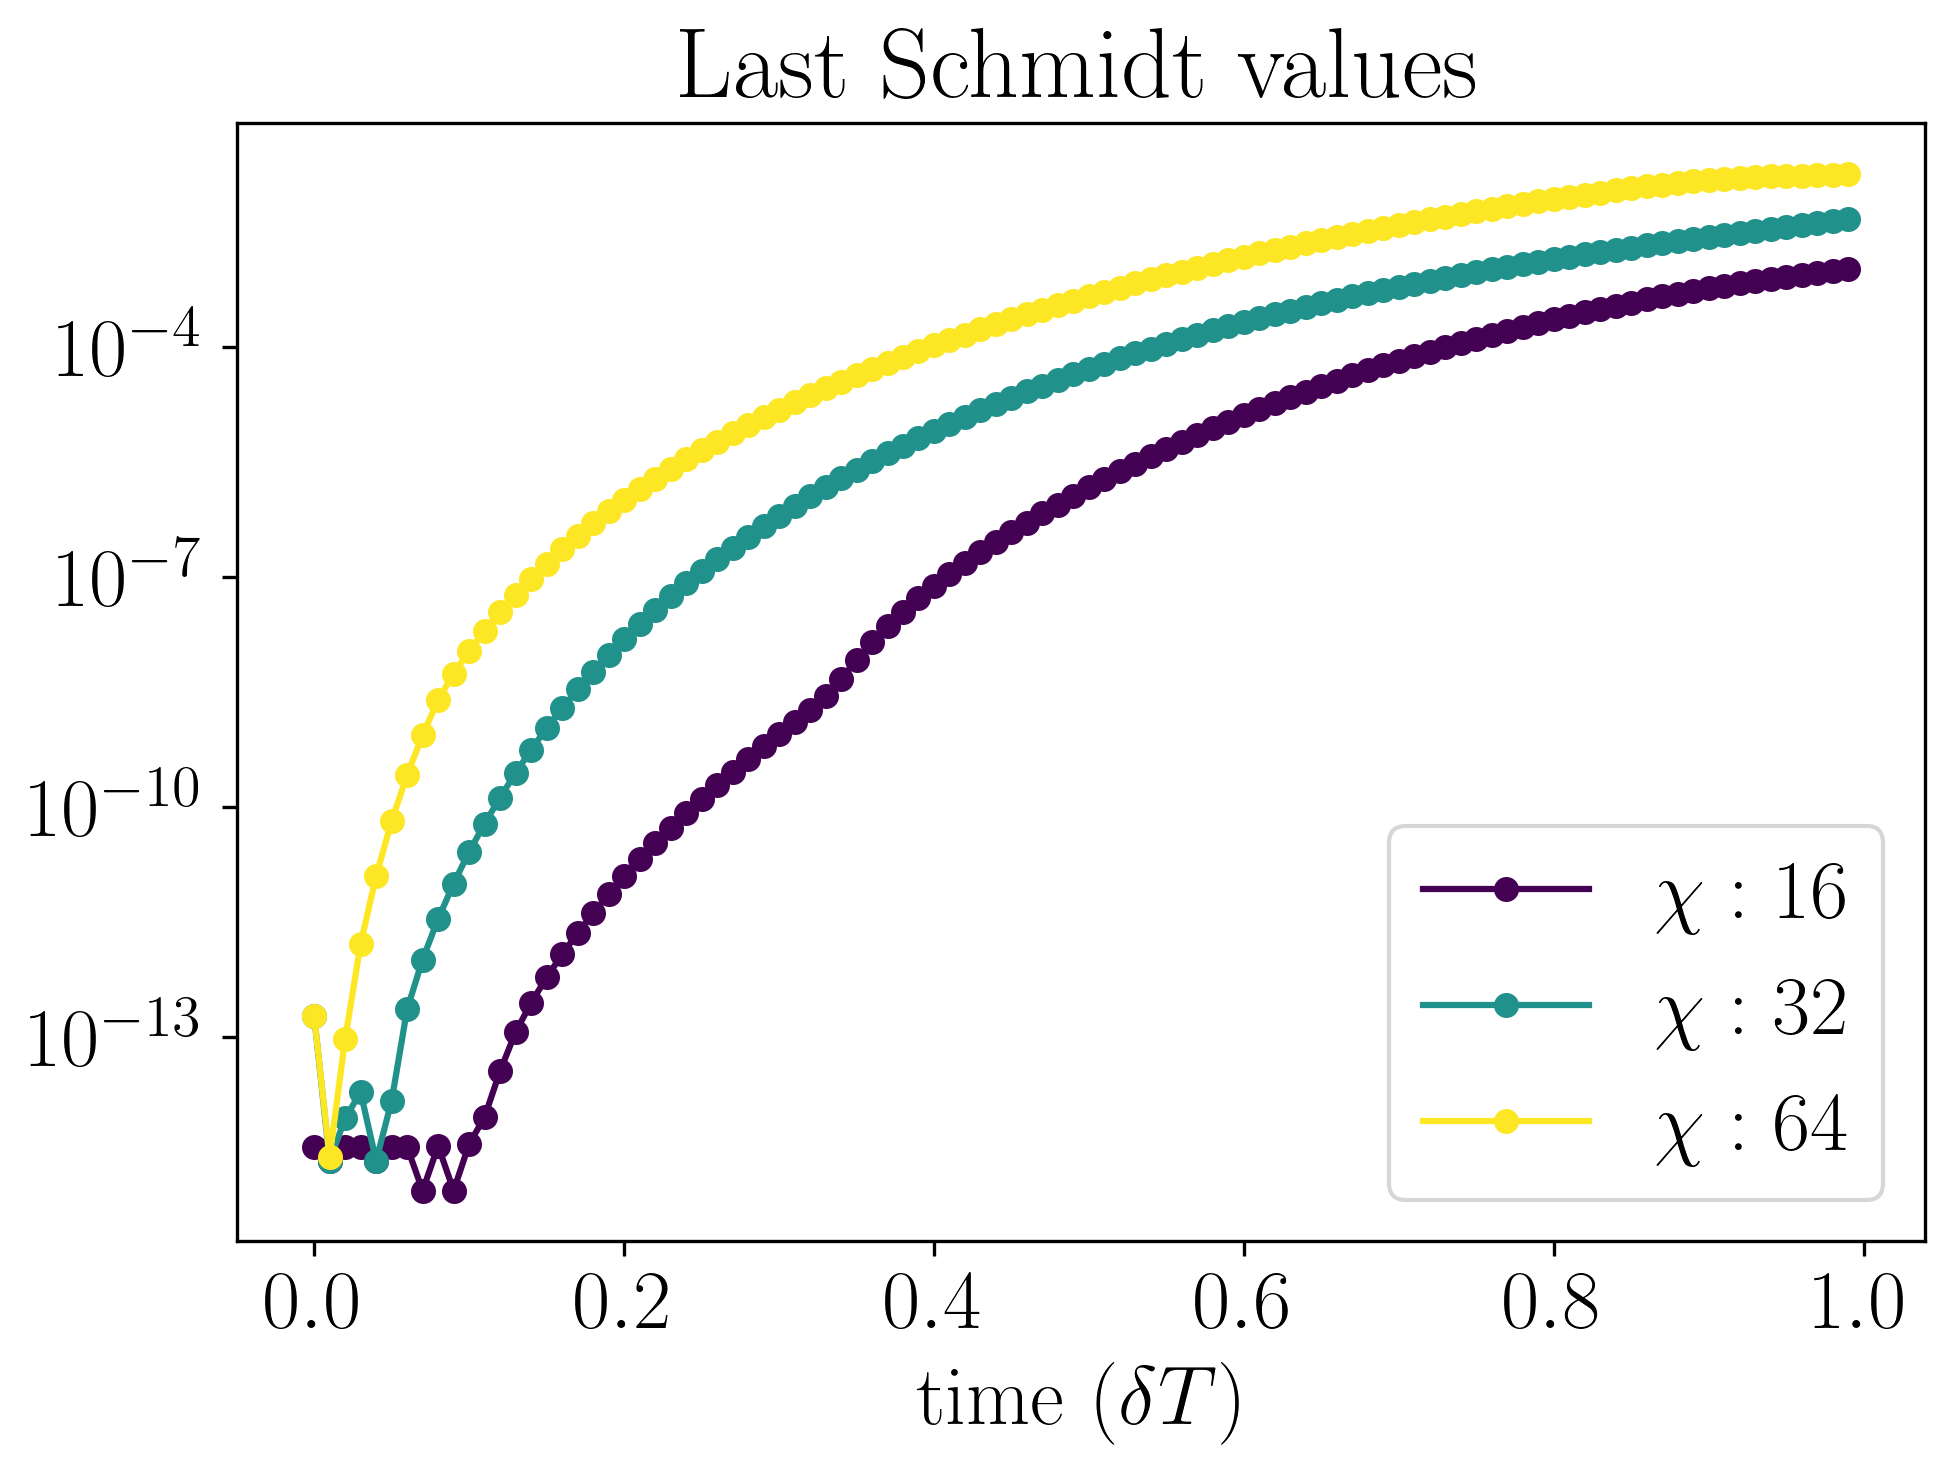

In [239]:
colors = create_sequential_colors(len(chis))
index = -1
plt.title(f"Last Schmidt values")
for i, sv in enumerate(smvals):
    arr = []
    for val in sv:
        arr.append(val[-1])
    plt.plot(delta*np.asarray(range(steps)), arr, marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.yscale("log")
plt.legend()

In [182]:
chis.reverse()

In [183]:
losch = []
for chi in chis:
    losch_chi = np.load(
        f"{path_tensor}/results/overlap/loschmidt_amplitudes_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    losch.append(losch_chi)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/12930034.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Loschmidt Echo $\mathcal{L}(t)$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/12930034.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/12930034.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], lines

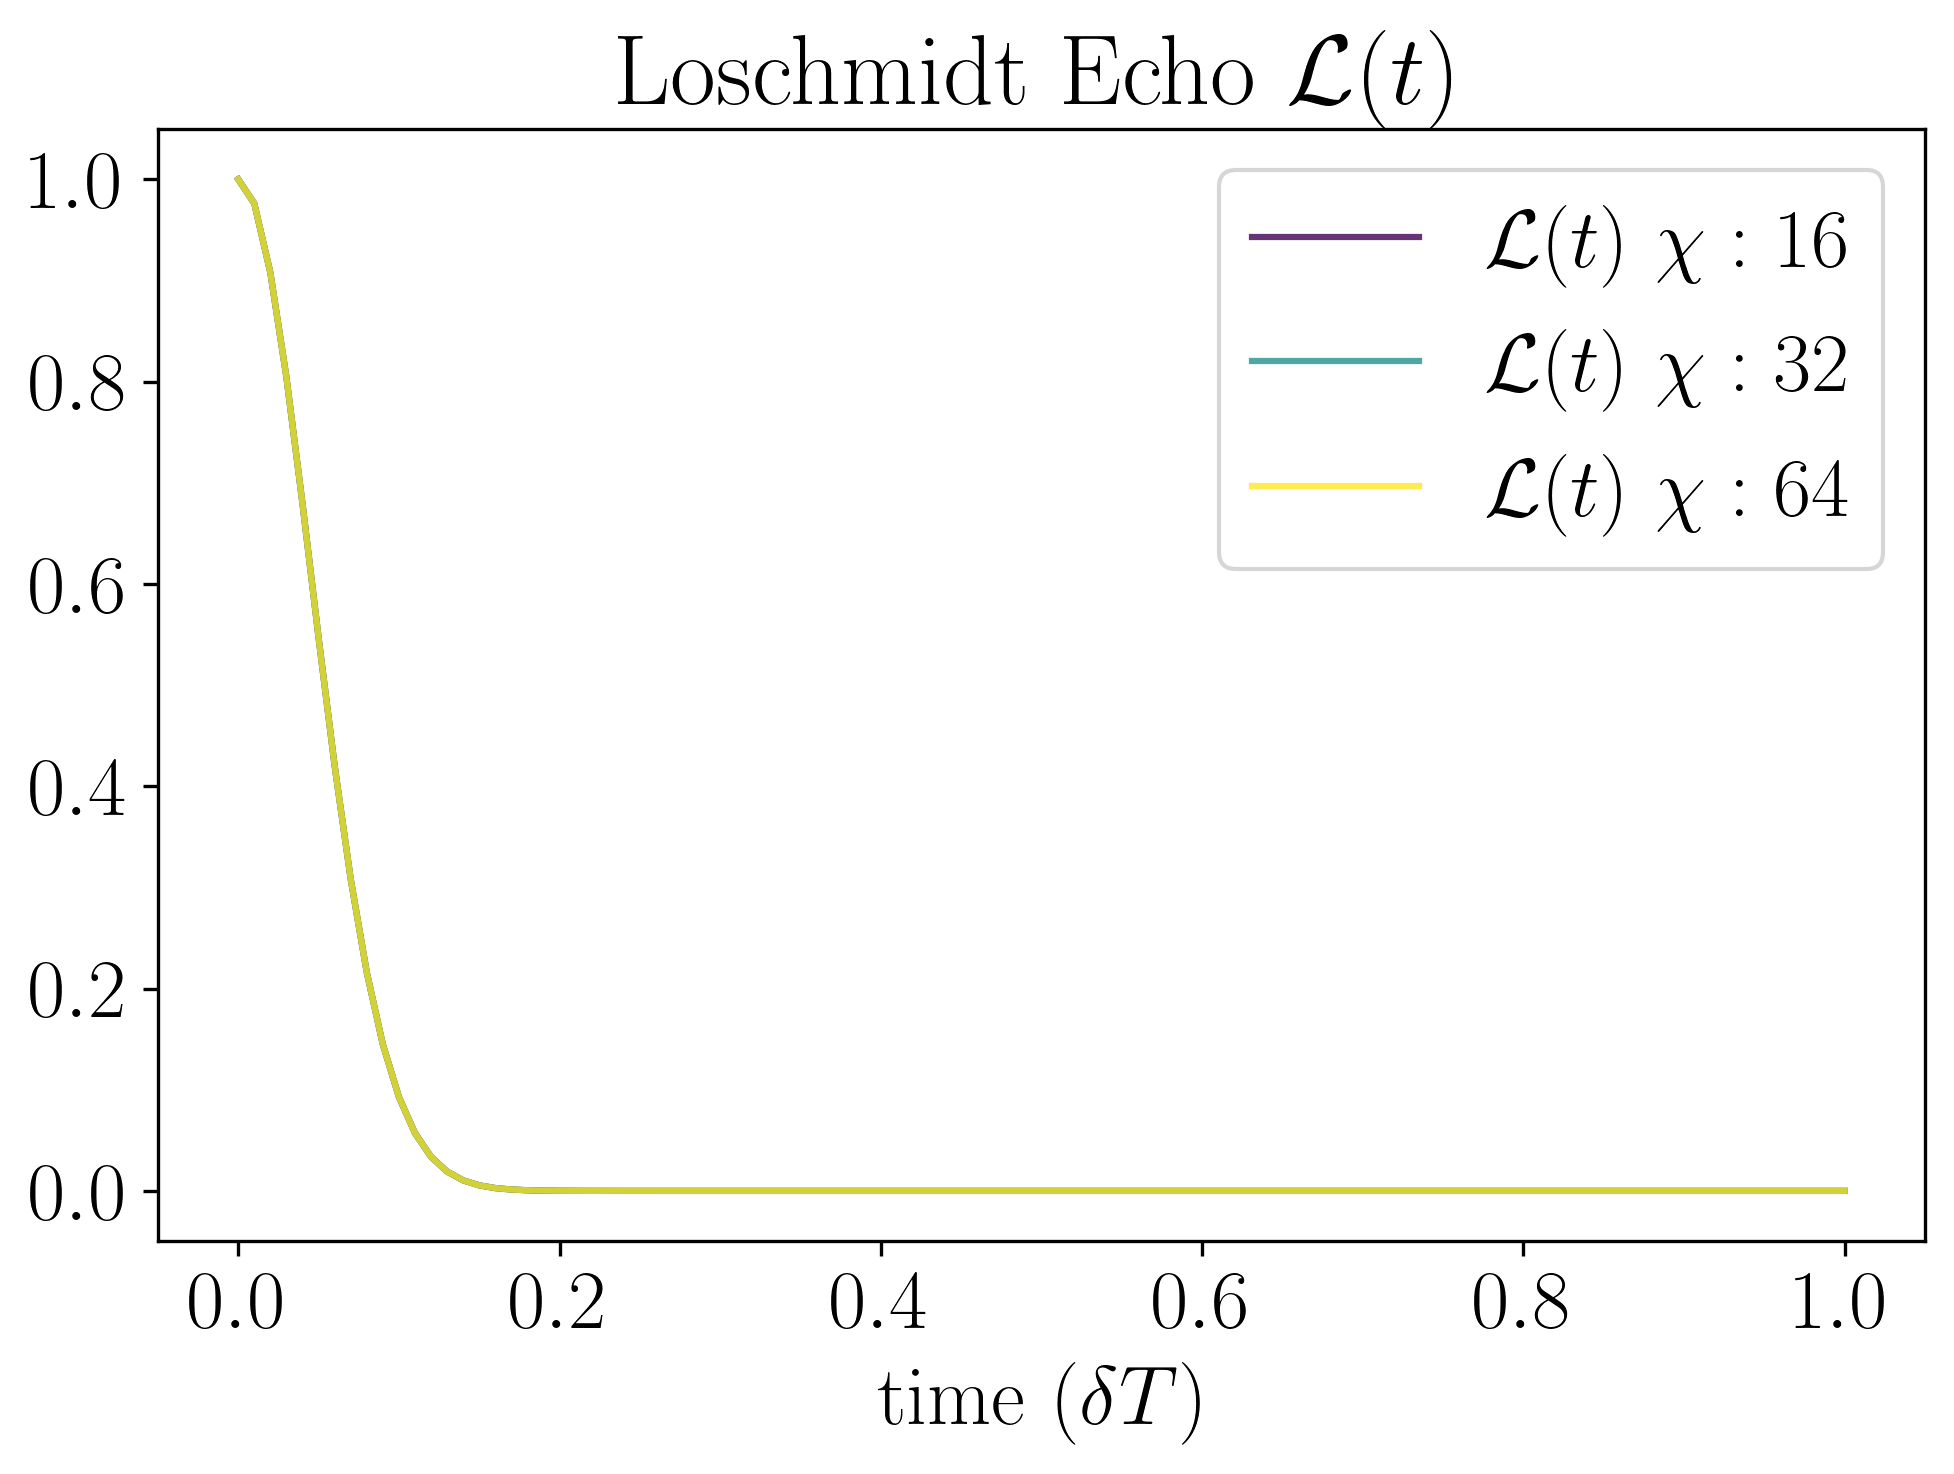

In [184]:
colors = create_sequential_colors(len(chis))
plt.title("Loschmidt Echo $\mathcal{L}(t)$")
for i, losch_amp in enumerate(losch):
    plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/2043103062.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Loschmidt Amplitude $\mathcal{G}(t)$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/2043103062.py:4: SyntaxWarning: invalid escape sequence '\R'
  plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
/var/folder

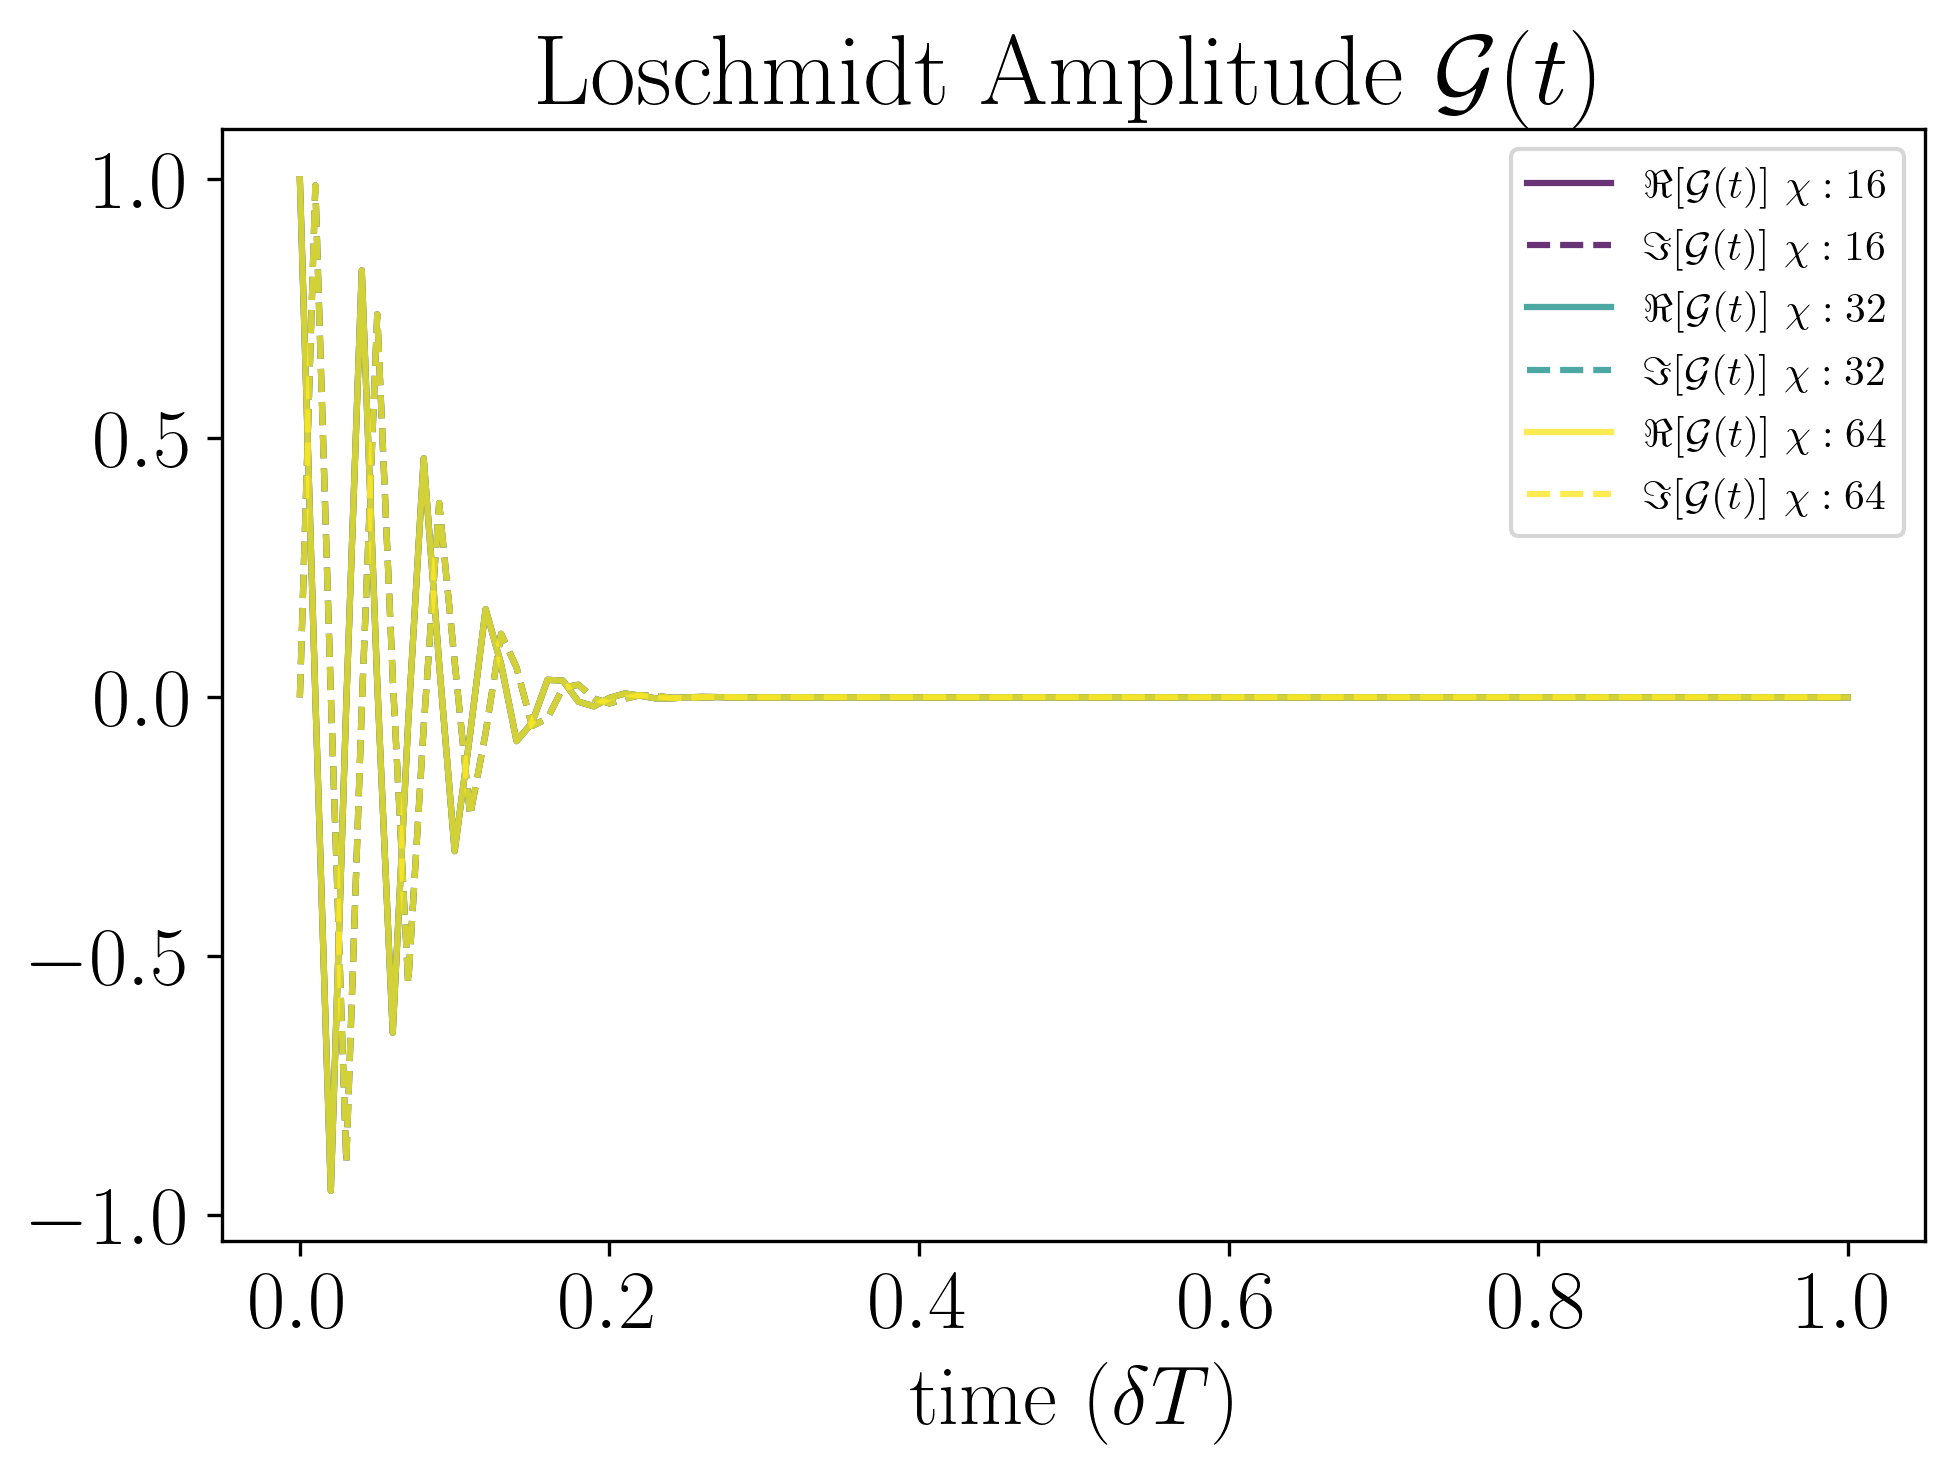

In [185]:
colors = create_sequential_colors(len(chis))
plt.title("Loschmidt Amplitude $\mathcal{G}(t)$")
for i, losch_amp in enumerate(losch):
    plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
    plt.plot(delta*np.asarray(range(steps+1)), [ov.imag for ov in losch_amp], linestyle="--", markersize=5, alpha=0.8, color=colors[i], label=f"$\Im[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/2429821501.py:2: SyntaxWarning: invalid escape sequence '\R'
  plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch[-1]], linestyle="-", markersize=5, alpha=0.8, color="C1", label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/2429821501.py:2: SyntaxWarnin

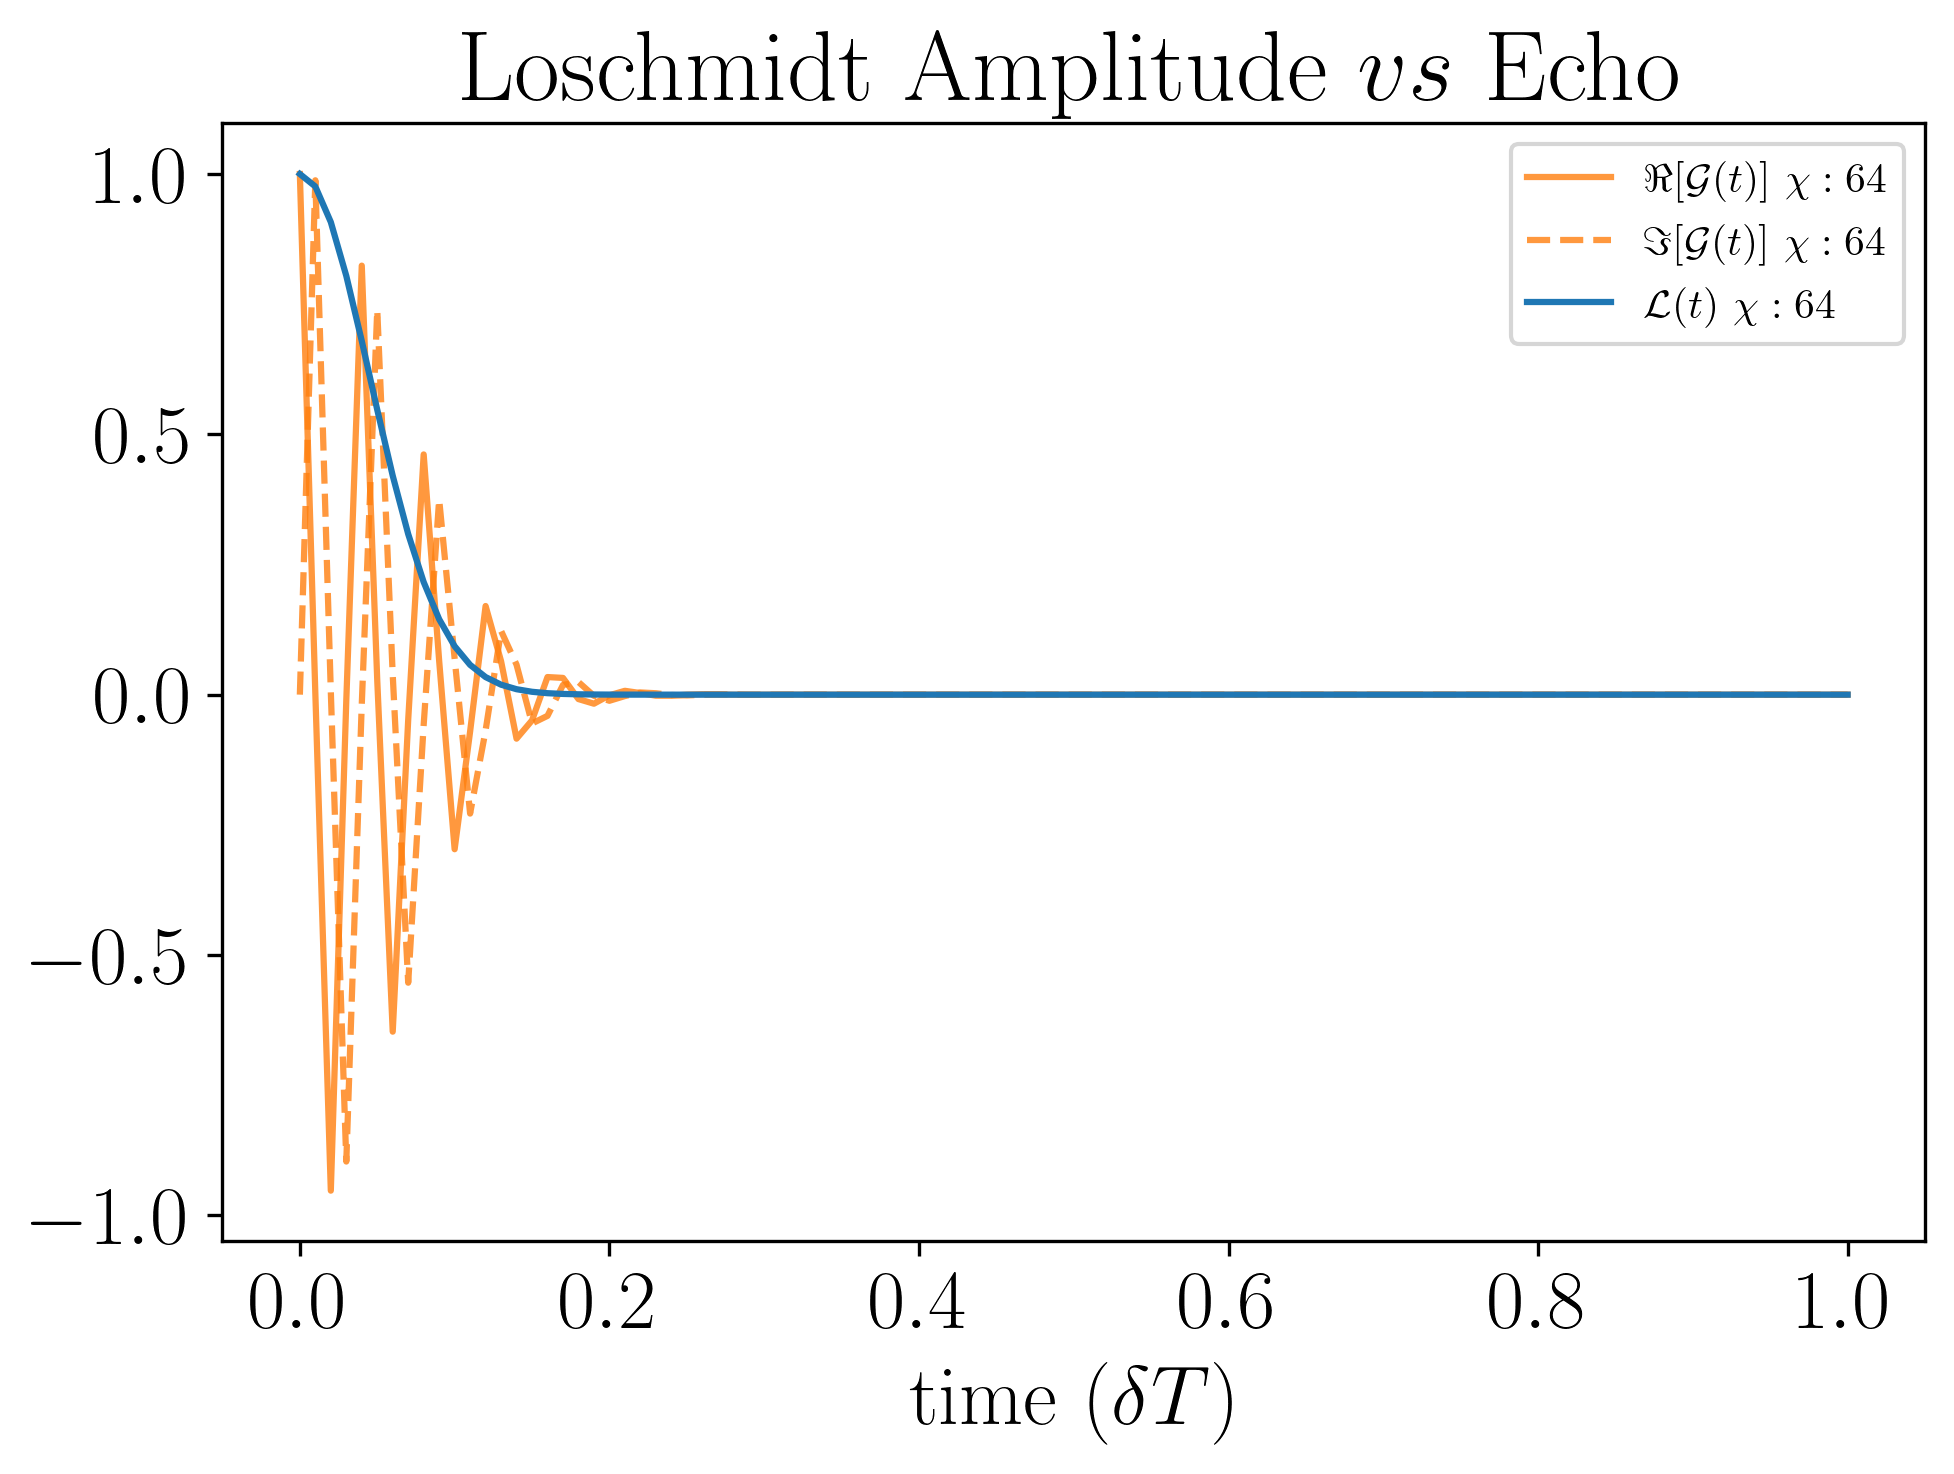

In [186]:
plt.title("Loschmidt Amplitude $vs$ Echo")
plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch[-1]], linestyle="-", markersize=5, alpha=0.8, color="C1", label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.plot(delta*np.asarray(range(steps+1)), [ov.imag for ov in losch[-1]], linestyle="--", markersize=5, alpha=0.8, color="C1", label=f"$\Im[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch[-1]], linestyle="-", markersize=5, alpha=1, color="C0", label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

In [226]:
ele_fields = []
for chi in chis:
    elf = np.load(
        f"{path_tensor}/results/electric_field/electric_field_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    ele_fields.append(elf)

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/2298599695.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][0][1::2][cx[0]:cx[1]]) for i in range(steps+1)], 'x',color=colorsb[j*2], label="$S_{\parallel}$ "+f"$\chi : {chis[j]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_12201/2298599695.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][0][1::2][cx[0]:cx[1]]) for i in range(steps+1)], 'x',color=colorsb[j*2], label="$S_{\parallel}$ "

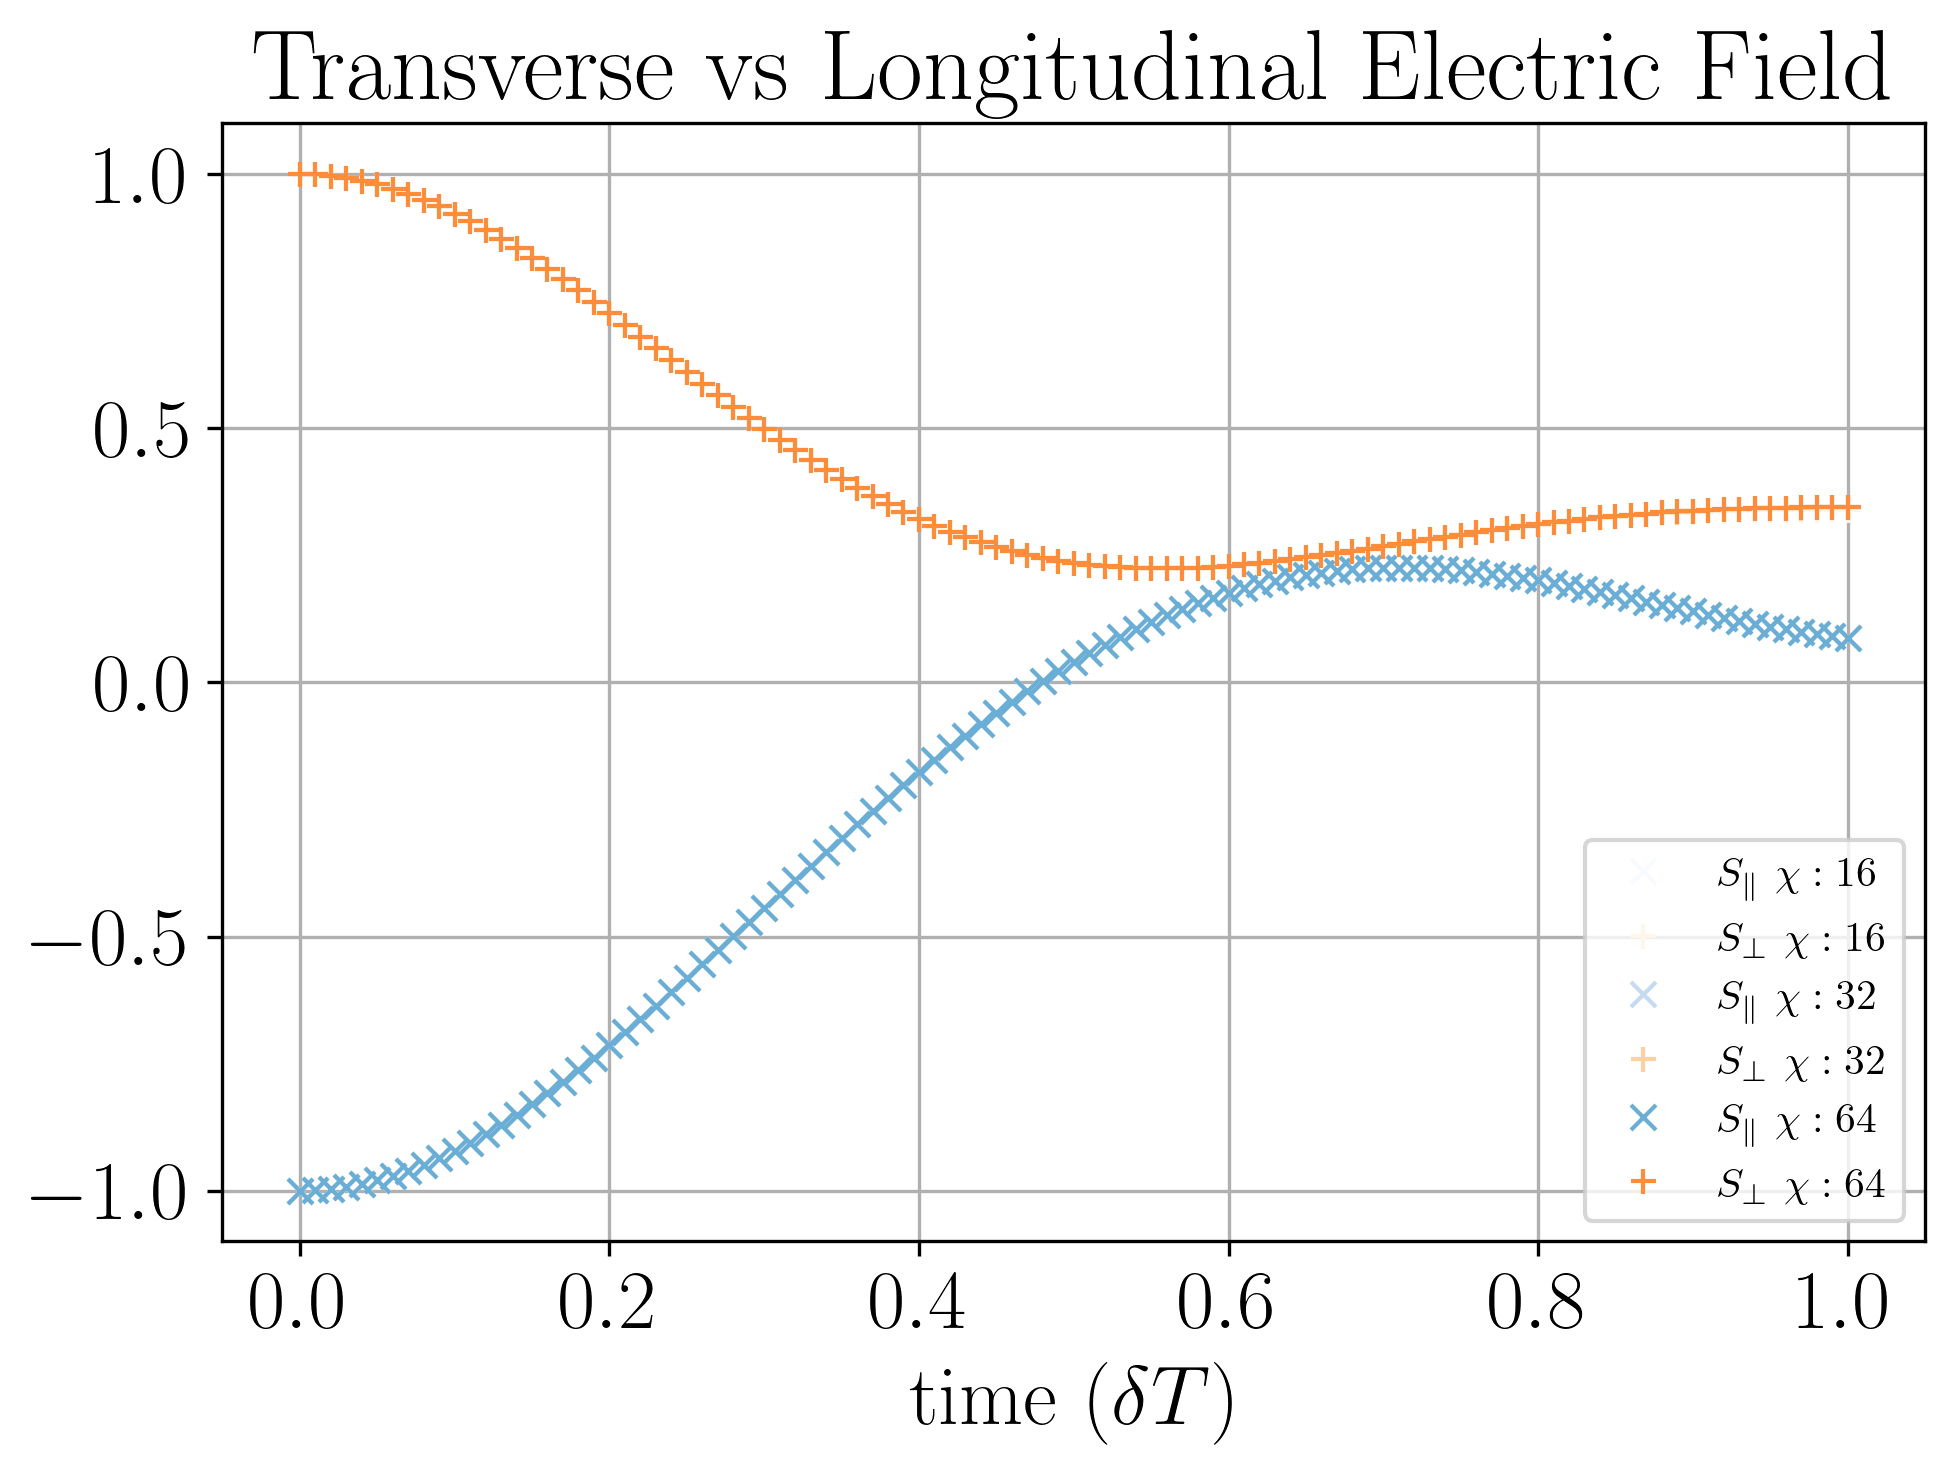

In [227]:
colorsb = create_sequential_colors(len(chis)*3, colormap_name="Blues")
colorso = create_sequential_colors(len(chis)*3, colormap_name="Oranges")
plt.title("Transverse vs Longitudinal Electric Field")
for j, efields in enumerate(ele_fields):
    plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][0][1::2][cx[0]:cx[1]]) for i in range(steps+1)], 'x',color=colorsb[j*2], label="$S_{\parallel}$ "+f"$\chi : {chis[j]}$")
    plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][1::2,0::2], axis=0)[(L+1)//2] for i in range(steps+1)], '+',color=colorso[j*2], label="$S_{\perp}$ "+f"$\chi : {chis[j]}$")
plt.grid(True)
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

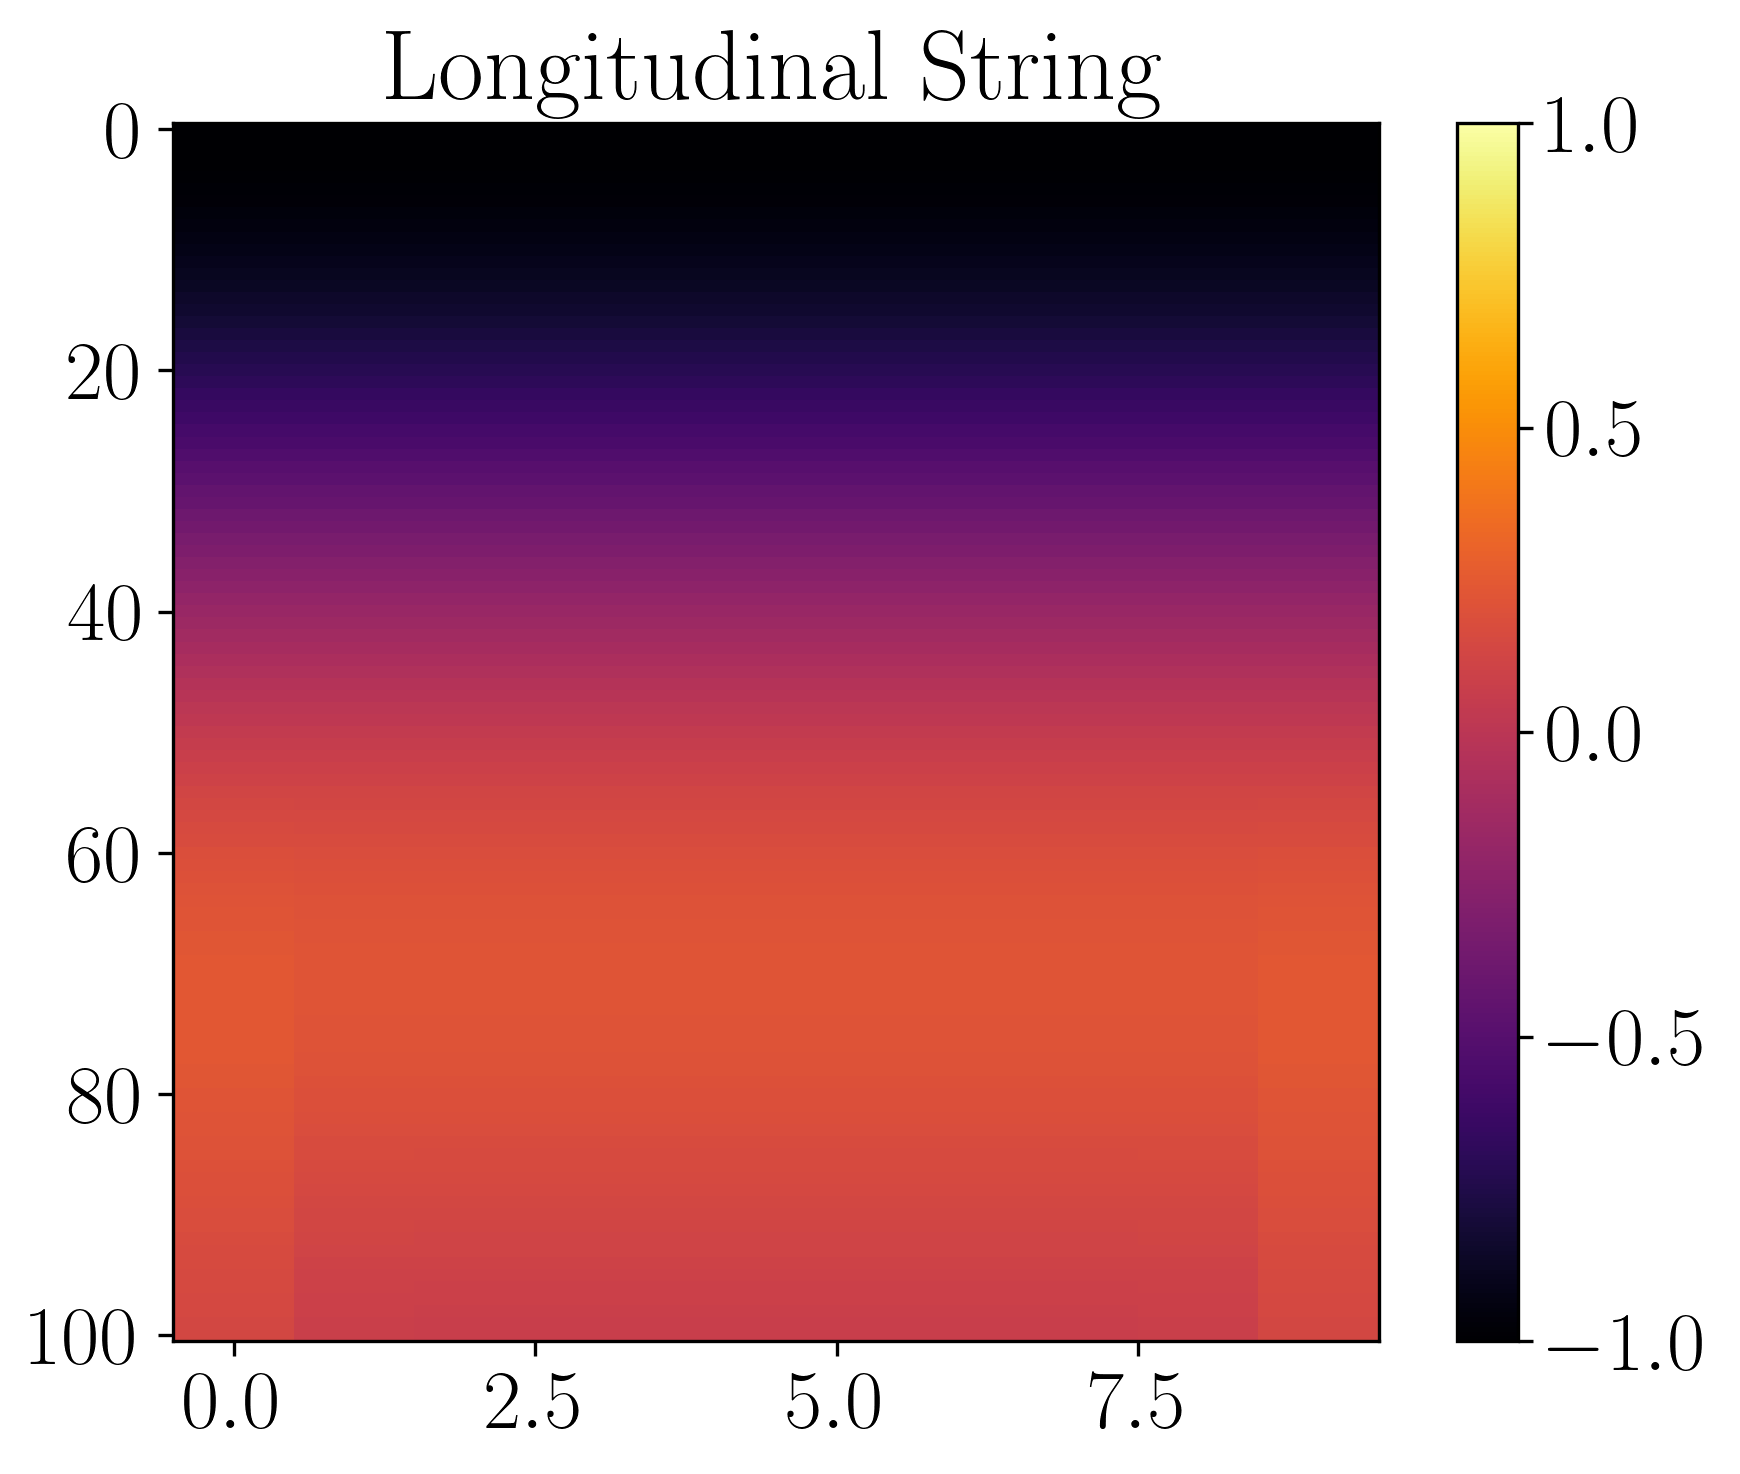

In [218]:
plt.title("Longitudinal String")
plt.imshow([efields[i][0][1::2][cx[0]:cx[1]] for i in range(steps+1)], cmap="inferno", vmin=-1, vmax=1, aspect=1/10)
plt.colorbar()

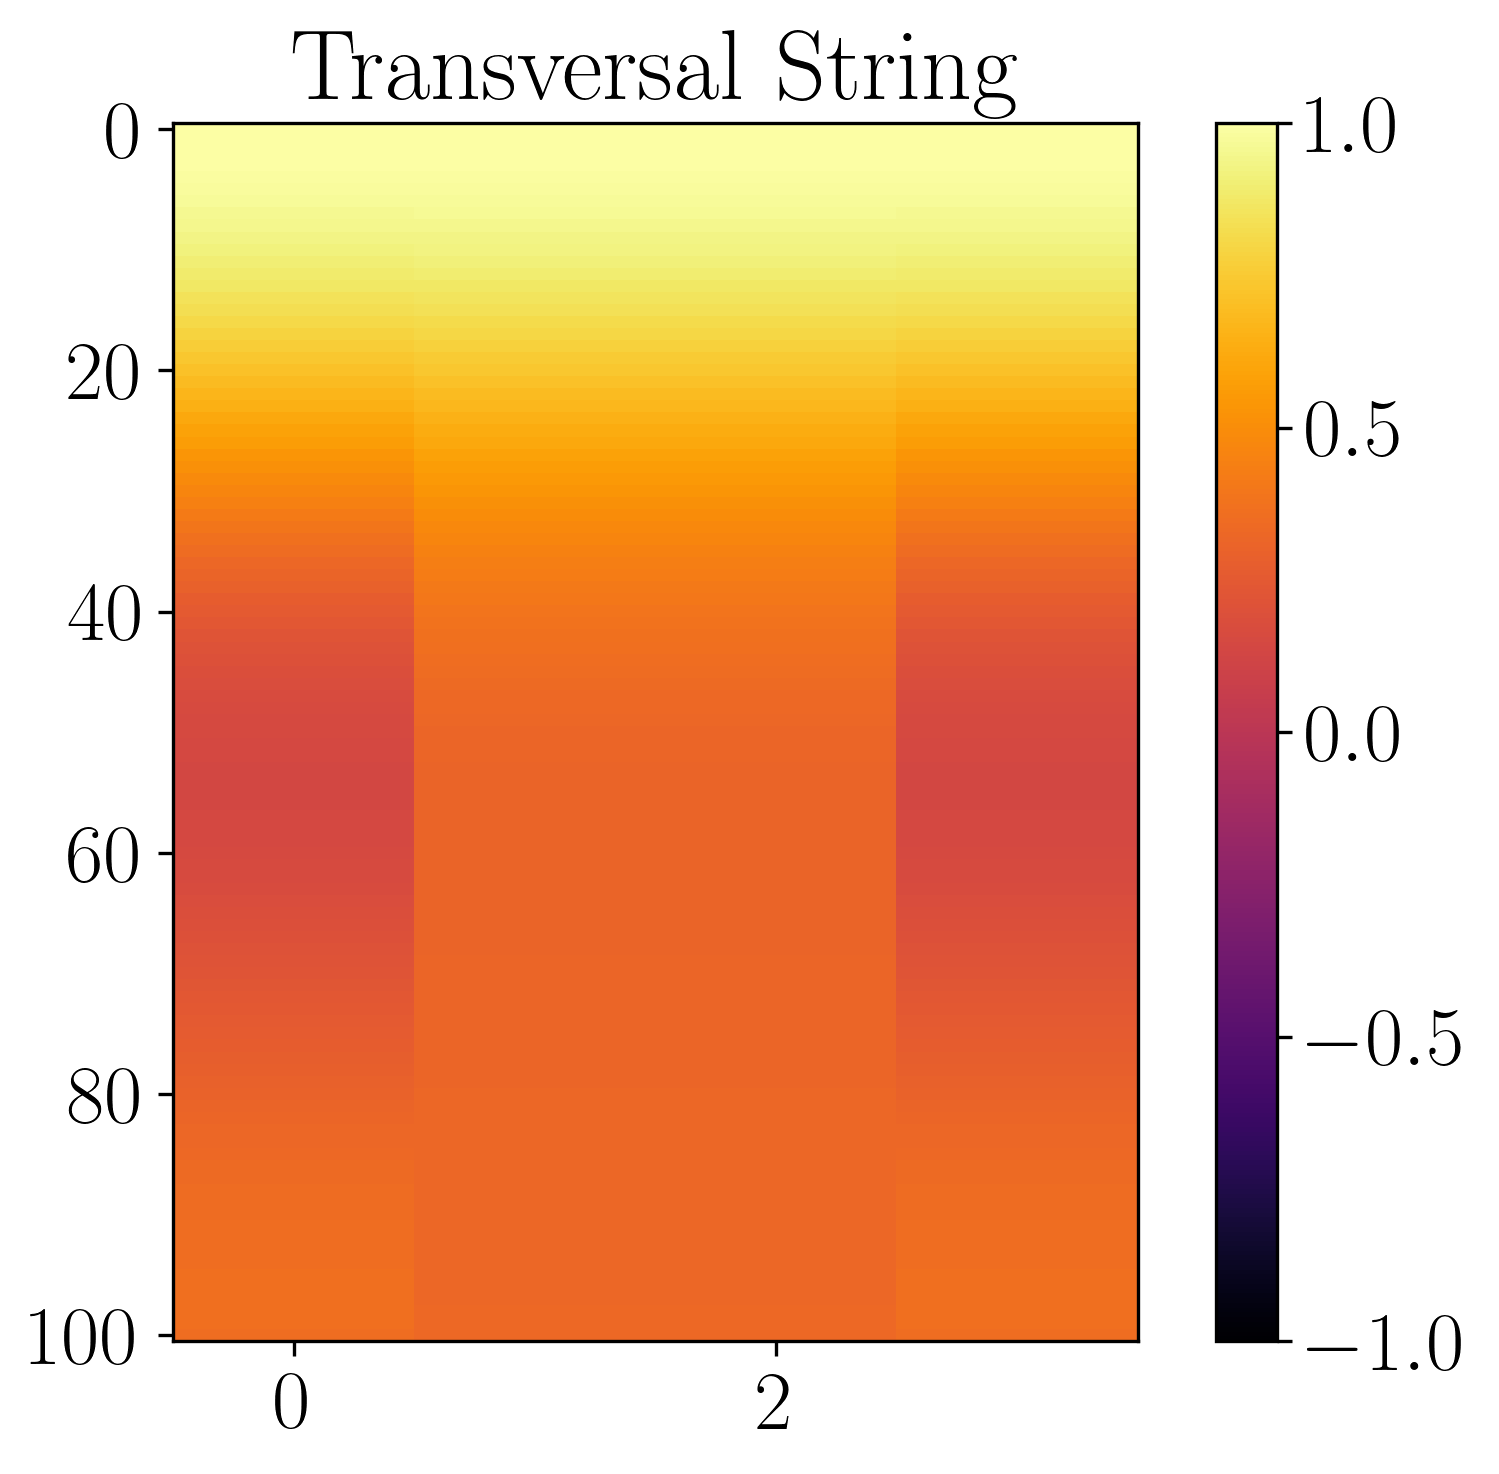

In [220]:
plt.title("Transversal String")
plt.imshow([np.asarray(efields[i][1::2,0::2])[:,L//2] for i in range(steps+1)], cmap="inferno", vmin=-1, vmax=1, aspect=1/20)
plt.colorbar()

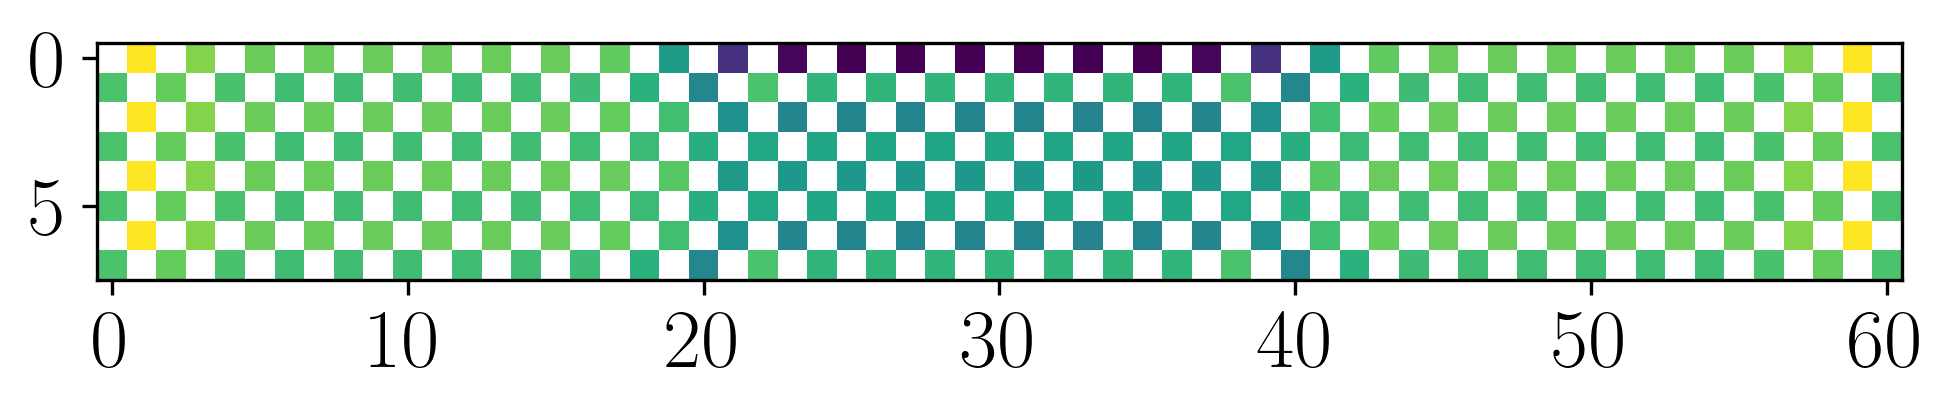

In [189]:
plt.imshow(efields[-1])

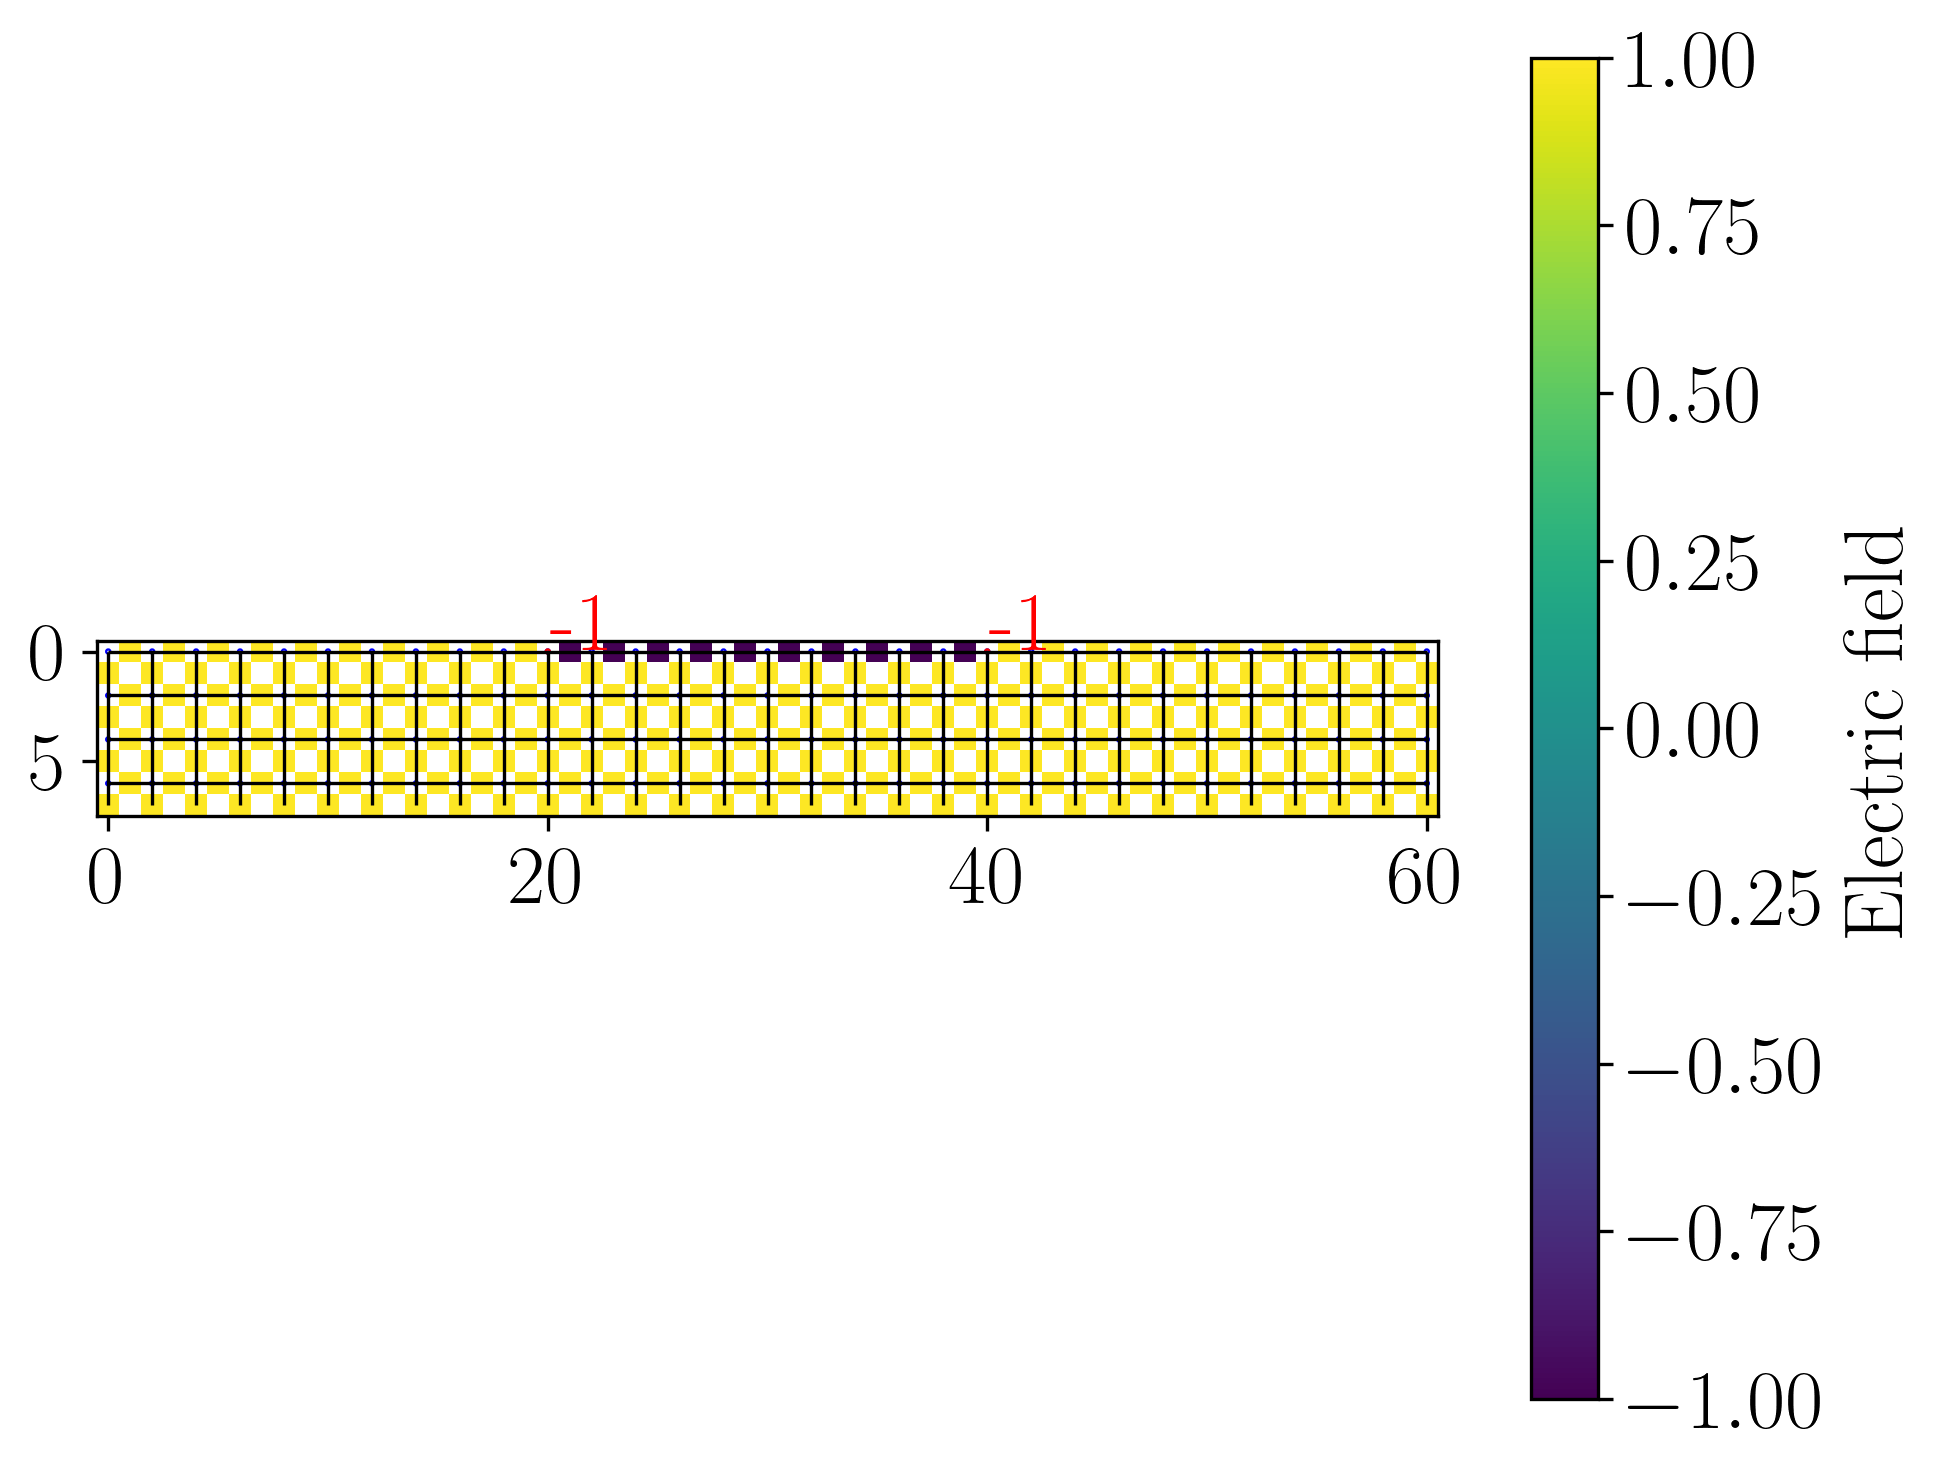

In [190]:
if save_gif:
    movie = anim(frames=steps+1, interval=200, data=efields, params=np.linspace(0,steps*delta,steps+1), show=True, charges_x=cx, charges_y=cy, precision=2, time=True)
    movie.save(filename=f"quench_mpo_{l}x{L}_g_start_{h_i}_g_ev_{h_ev}_trott_steps_{steps}_delta_{delta}_chi_{chi}.gif")